# Load Dependencies

In [1]:
#%matplotlib notebook
%matplotlib inline

#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Files to Load

In [2]:
#Files to Load
cleaned_poverty_df = 'Cleaned_Data/cleaned_poverty_df.csv'
cleaned_unemployment_df = 'Cleaned_Data/cleaned_unemployment_df.csv'
cleaned_unemployment_rate_df = 'Cleaned_Data/cleaned_unemployment_rate_df.csv'
crime_df = 'Cleaned_Data/crime_df.csv'
crime_police_merged = 'Cleaned_Data/crime_police_merged.csv'
police_count_2014_2017_df = 'Cleaned_Data/police_count_2014_2017_df.csv'
police_df = 'Cleaned_Data/police_df.csv'

#Files to Read
cleaned_poverty_df = pd.read_csv(cleaned_poverty_df)
cleaned_unemployment_df = pd.read_csv(cleaned_unemployment_df)
cleaned_unemployment_rate_df = pd.read_csv(cleaned_unemployment_rate_df)
crime_df = pd.read_csv(crime_df)
crime_police_merged = pd.read_csv(crime_police_merged)
police_count_2014_2017_df = pd.read_csv(police_count_2014_2017_df)
police_df = pd.read_csv(police_df)

C:\Users\asher\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Crimes by State

In [3]:
#create new dataframe with columns needed for graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select years 2014-2017
only_year_2014_2017_4 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_4 = df.loc[only_year_2014_2017_4]

#groupby state
groupby_year_state = crime_df_4.groupby(["State"])

#get the total sum of offender count after grouping by the state
crime_year_state = groupby_year_state["Total Offender Count"].sum()

#create series into dataframe
crime_year_state = pd.DataFrame(crime_year_state)

#sort the total offender count in descending order to get the states with highest count
crime_year_state = crime_year_state.sort_values(["Total Offender Count"],ascending=[False]) 

#reset the index
crime_year_state = crime_year_state.reset_index()

#select the top 5 states with highest total offender count 
crime_year_state = crime_year_state.head()

Text(0, 0.5, 'Total Crime Count')

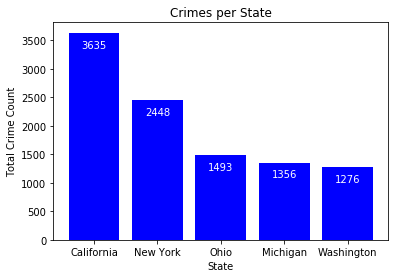

In [8]:
#create bar graph

#set the x axis
state = (crime_year_state["State"])

#set the y axis
crime = (crime_year_state["Total Offender Count"])

#plot the line graph for California 
bar_chart = plt.bar(state, crime, color="b", align="center")

def label_function(labels):
    for label in labels:
        height = label.get_height()
        label_position = height - 300
        plt.text(label.get_x() + label.get_width()/2., label_position,
                 height, color='white', ha='center', va='bottom')

label_function(bar_chart)

#set labels
plt.title("Crimes per State")
plt.xlabel("State")
plt.ylabel("Total Crime Count")